# **MDI 220 Statistiques**
## **Mini-Projet**
### Élève : Alaf do Nascimento Santos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

def myplot (t, x, y):
    plt.title(t)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid()
    plt.show()

def verifierP(p,alpha):
    print("p-valeur = " + str(p))
    strDB = "Lorsque alpha = " + str(alpha)
    if alpha > p:
        print(strDB + ", l'hypothèse nulle est rejetée (p-valeur < α)")
        print("On peut affirmer que le coût moyen d’accident est inférieur à un milliard de dollars")
    else:
        print(strDB + ", l'hypothèse nulle n'est pas rejetée (p-valeur >= α)")
        print("On ne peut pas affirmer que le coût moyen d’accident est inférieur à un milliard de dollars")

#### **Exercice 1 (Exploration des données, recherche de leur loi):**



**1. D’une manière automatique, former un vecteur des coût des accidents (strictement) avant l’accident de Three Mile Island, en million dollars 2013 et supprimer toutes les observations (avec données) manquantes.
Vous devez obtenir n = 55 observations x1, ..., xn.**

In [2]:
cost = 'Cost (millions 2013US$)'
eventDate = '1979-03-28'
dbs = pd.read_csv("NuclearPowerAccidents2016.csv")
dbs.Date = pd.to_datetime(dbs["Date"])
dbs = dbs[dbs.Date<eventDate]
dbs = dbs.dropna(subset=[cost])
dbs = dbs[cost]
dbsSize = len(dbs)
print('n = ' + str(dbsSize) + ' observations')

n = 55 observations


**2. Construction d’un QQ-plot normal.**

**(a) Montrer que la fonction quantile d’une loi normale...**

Soit $X$ et $X_r$ deux v.a. : $X \sim N(\mu,\sigma)$, $X_r \sim N(0,1)$ et $X = \mu + \sigma X_r$.

On considère, $\forall p \in \;]0,1[$,
    $$x = F^{-1}(p; \mu, \sigma^2)$$
    $$y = F^{-1}(p;0,1)$$

Donc, si on calcule 
    $$F(x) = F(F^{-1}(p; \mu, \sigma^2)) = p$$
et 

$$F(X(y)) = F(\mu + \sigma F^{-1}(p;0,1)) = P(X < \mu + \sigma F^{-1}(p;0,1)) = P\left(\frac{X - \mu}{\sigma} < F^{-1}(p;0,1)\right)$$

$$\implies F((\mu + \sigma F^{-1}(p;0,1)) = P\left(\frac{X - \mu}{\sigma} < F^{-1}(p;0,1)\right) = P(X_r < F^{-1}(p;0,1)) = p$$


$\forall p \in \;]0,1[$

Alors, on a 

$$F(x) = F(X(y)) \implies F(F^{-1}(p; \mu, \sigma^2)) = F((\mu + \sigma F^{-1}(p;0,1)) \implies F^{-1}(p; \mu, \sigma^2) = \mu + \sigma F^{-1}(p;0,1)$$ 

et donc

$$\boxed{F^{-1}(p; \mu, \sigma^2) = \mu + \sqrt{\sigma^2} F^{-1}(p;0,1)}$$

**(b) Tracer le QQ-plot de données pour la loi normale (vous pouvez utiliser la fonction
probplot de la librairie SciPy).**

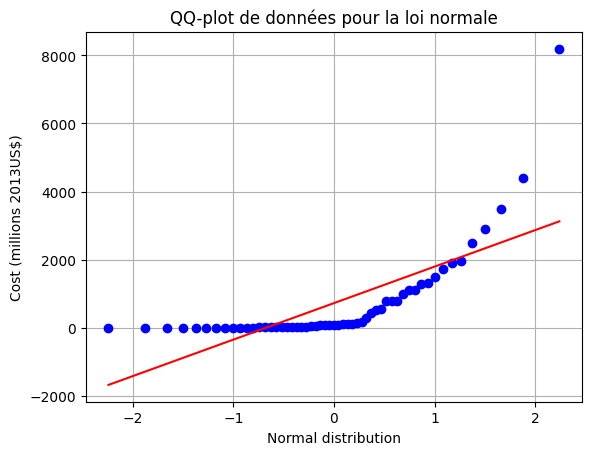

In [3]:
stats.probplot(dbs, dist='norm', fit=True, plot=plt)
myplot('QQ-plot de données pour la loi normale', 'Normal distribution', 'Cost (millions 2013US$)')

**3. On considère maintenant le modèle des lois exponentielles**

**(a) Montrer que pour un quantile d’une loi exponentielle de paramètre...**

Soit $F(x;\lambda) = 1 - exp(-\lambda x), \forall x \geq 0$.
On considère, $p \in (0,1)$, 
    $$x = F^{-1}(p;1)$$
    $$y = F^{-1}(p;\lambda)$$
Alors,
$$F(x,1) = 1 - exp(-1 \cdot x) = 1 - exp(-x) = p$$
$$F(y,\lambda) = 1 - exp(-\lambda y) = p$$
Donc,
$$F(x,1) = F(y,\lambda) \implies 1 - exp(-x) = 1 - exp(-\lambda y) \implies exp(-x) = exp(-\lambda y)$$
$$exp(-x) = exp(-\lambda y) \implies y = \frac{x}{\lambda}$$
Finalement,
$$y = \frac{x}{\lambda} \implies \boxed{F^{-1}(p;\lambda) = \frac{1}{\lambda} \cdot F^{-1}(p;1), \;p \in (0,1)}$$

    

**(b) Tracer le QQ-plot de données pour la loi exponentielle**

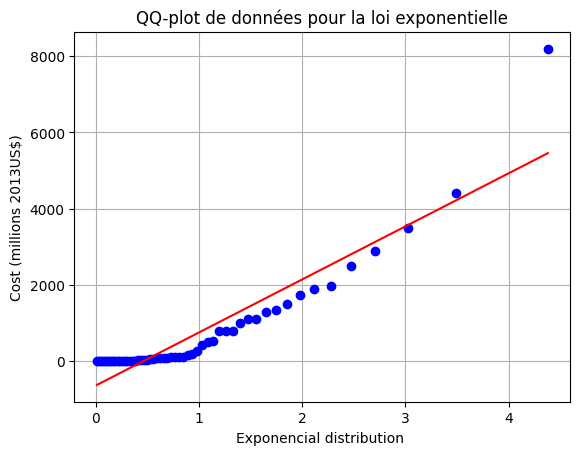

In [4]:
stats.probplot(dbs, dist='expon', fit=True, plot=plt)
myplot('QQ-plot de données pour la loi exponentielle', 'Exponencial distribution ', 'Cost (millions 2013US$)')

**4. Discuter, en vu de QQ-plots obtenus, quelle loi semble être plus plausible pour les
données.**

En vu de QQ-plots obtenus, la loi exponentielle semble la plus plausible pour les donnés. Cet approche est indiqué parce que le QQ-plot ressemble plus à une droite sur le cas de la loi exponentielle par rapport au QQ-plot de données pour la loi normale.

#### **Exercice 2 (Estimation ponctuelle des paramètres d’une loi exponentielle):**

**1. Calculer l’estimateur du maximum de vraisemblance...**

On part de la densité de probabilité de la loi exponentielle, qui est donnée par $y = \lambda e^{-\lambda x}$. Donc, du coup, la vraisemblance du modèle est donnée par $p_\lambda(x;\lambda) = \lambda^n e^{-\lambda \sum_{i=1}^n x_i}$

On calcule l'estimateur du maximum de vraisemblance $\hat{\lambda_n}$ pour le paramètre de la loi exponentielle $\lambda$,

$$
\log{(p_\lambda(x;\lambda))} = \log{(\lambda^n e^{-\lambda \sum_{i=1}^n x_i})} = \log{(\lambda^n)}+ \log{(e^{-\lambda \sum_{i=1}^n x_i})} = n\log{(\lambda)} + (-\lambda \sum_{i=1}^n x_i)
$$

$$
\implies \log{(p_\lambda(x;\lambda))} = n\log{(\lambda)} -\lambda \sum_{i=1}^n x_i 
$$

Quand $\lambda = \hat{\lambda_n}$, on a $\dfrac{\partial\log{(p_\lambda(x;\lambda))}}{\partial \lambda} = 0$ et alors,

$$
\frac{\partial\log{(p_\lambda(x;\lambda))}}{\partial \lambda}  = n\frac{1}{\lambda} - \sum_{i=1}^n x_i = 0 \implies n\frac{1}{\hat{\lambda_n}} = \sum_{i=1}^n x_i \implies \hat{\lambda_n} = \frac{n}{\sum_{i=1}^n x_i}
$$

Finalement,
$$
\boxed{\hat{\lambda_n} = \frac{n}{\sum_{i=1}^n x_i}}
$$

In [5]:
estimateur = dbsSize/dbs.sum()
print('Estimateur du maximum de vraisemblance : ' + str(estimateur))

Estimateur du maximum de vraisemblance : 0.0013767725947156965


**2. Tracer sur le même graphique l’histogramme de données...**

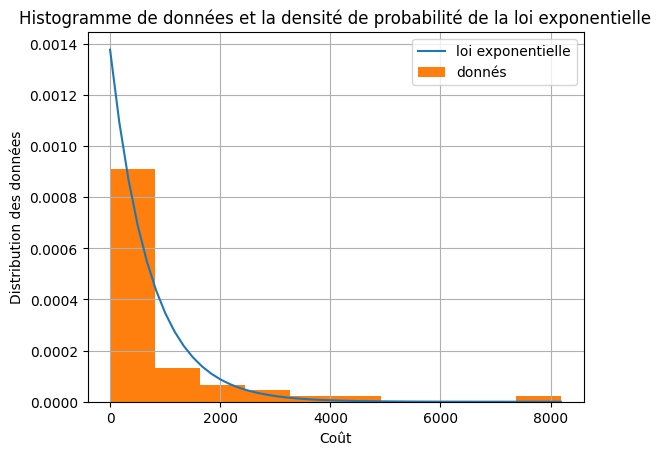

In [6]:
cost = np.linspace(dbs.min(),dbs.max())
exp = estimateur*np.exp(-estimateur*cost)
plt.plot(cost, exp)
plt.hist(dbs, density=True)
plt.legend(['loi exponentielle', 'donnés'])
myplot('Histogramme de données et la densité de probabilité de la loi exponentielle', "Coût", "Distribution des données")


**3. On cherche à estimer la grandeur d’intérêt...**

On admet que le modèle $\{P_\lambda, \lambda > 0\}$ est régulier.

Premièrement, on doit montrer que l'estimateur est sans biais. Alors,


$$
E(T_1(X)) = E\left(\frac{1}{n}\sum_{i=1}^n X_i\right) = \frac{1}{n} \sum_{i=1}^n E(X_i) = \frac{1}{n} \cdot n \cdot \frac{1}{\lambda} = \frac{1}{\lambda} = g_1(\lambda)
$$

La deuxième condition est que sa variance doit respecter la borne de Cramér-Rao. Alors,

$$
Var(T_1(X)) = Var\left(\frac{1}{n} \sum_{i=1}^n X_i\right) = \frac{1}{n^2} \sum_{i=1}^n Var(X_i) = 
\frac{1}{n^2} \cdot \frac{n}{\lambda^2} =\frac{1}{n\lambda^2} 
$$

Maintenant on calcule l'information de Fisher,

$$
I_1 (\lambda)  = E_\lambda \left(\frac{\partial\log{p_\lambda(x;\lambda)}}{\partial \lambda}^2\right) = E_\lambda\left(\left(\frac{1}{\lambda} -x\right)^2\right) = \frac{1}{\lambda^2}
$$

$$
I_1\left(\lambda\right) =  E\left(\left(\frac{\partial \left(\ log \ f\left(X\right)\right)}{\partial \ \lambda}\right)^2\right) =  E\left(\left(\frac{\partial \left(log\left(\lambda\right) - \lambda \ X\right)}{\partial \ \lambda}\right)^2\right) =  E\left(\left(\frac{1}{\lambda} - X\right)^2\right)
$$

$$
\implies I_1\left(\lambda\right) = E\left(\frac{1}{\lambda^2} - \frac{2X}{\lambda} + X^2\right) =  E\left(\frac{1}{\lambda^2}\right) - E\left(\frac{2X}{\lambda}\right) + E\left(X^2\right)
$$

$$
\implies I_1\left(\lambda\right) = \frac{1}{\lambda^2} - \frac{2}{\lambda^2} + \frac{2}{\lambda^2} =  \frac{1}{\lambda^2}
$$

$$ 
\implies I_1\left(\lambda\right) = \frac{1}{\lambda^2}
$$

Finalement,

$$
g_1(\lambda) = \dfrac{1}{\lambda} \implies g_1'(\lambda) = -\dfrac{1}{\lambda^2} \implies g_1'(\lambda)^2 = \dfrac{1}{\lambda^4}
$$

On vérifie si la borne de Cramér-Rao est atteinte,

$$
Var(T_1(X)) \ge \frac{\left(\dfrac{\partial g_1(\lambda)}{\partial  \lambda}\right)^2}{n I_1{(\lambda)}} \implies \dfrac{1}{n\lambda^2} \ge  \dfrac{\frac{1}{\lambda^4}}{n \cdot \frac{1}{\lambda^2}} \implies \dfrac{1}{n\lambda^2} = \dfrac{1}{n\lambda^2} 
$$

Donc $T_1(X)$ est un estimateur efficace pour $g_1(\lambda)$.

**4. Calculer g1 en utilisant T1 pour l’échantillon donné.**

In [7]:
T1=(dbs.sum()/dbsSize)
print("g1 = " + str(T1))

g1 = 726.3363636363637


**5. Soit η > 0. On considère le nouvel estimateur...**

On calcule les risque quadratiques, en utilisant la décomposition biais-variance, pour $T_1(X)$

$$
bias(\lambda,T_1(X)) = 0
$$

$$
Var_{\lambda}(T_1(X)) = \frac{1}{n \lambda^2}
$$

$$
R(\lambda, T_1(X)) = (bias(\lambda,T_1(X)))^2 + Var_{\lambda}(T_1(X)) = Var_{\lambda}(T_1(X)) = \frac{1}{n \lambda^2}
$$

$$
\implies R(\lambda, T_1(X)) = \frac{1}{n \lambda^2}
$$


Maintenant pour $\tilde{T}_{1,\eta}(X)$,
$$
bias(\lambda,\tilde{T}_{1,\eta}(X)) = E_\lambda[\tilde{T}_{1,\eta}(X)-g_1(x)] = E\lambda[\eta T_1(X)] - E_\lambda[g_1(x)] = \eta \frac{1}{\lambda}-\frac{1}{\lambda}
$$

$$
var[\tilde{T}_{1,\eta}(X)] = var[\eta T_1(X)]= \eta ^2 var[T_1(X)] = \frac{\eta^2}{n\lambda^2}
$$

$$
R(\lambda, \tilde{T}_{1,\eta}) = (\frac{\eta}{\lambda}-\frac{1}{\lambda})^2+\frac{\eta^2}{n\lambda^2}=\frac{1}{\lambda^2}\left[\eta^2+1-2\eta+\frac{\eta^2}{n}\right]=\frac{1}{\eta^2}\left[\frac{n(\eta^2+1-2\eta)+\eta^2}{n}\right]
$$

$$
\implies R(\lambda, \tilde{T}_{1,\eta}) = \frac{1}{\eta^2}\left[\frac{n(\eta^2+1-2\eta)+\eta^2}{n}\right]
$$

On cherche les valeurs de $\eta$ tels que $R(\lambda,\tilde{T}_{1,\eta})<R(\lambda,T_1)$, donc

$$
R(\lambda,T_1) - R(\lambda,\tilde{T}_{1,\eta}) > 0 \implies \frac{1}{n\lambda^2} - \frac{1}{\eta^2}\left[\frac{n(\eta^2+1-2\eta)+\eta^2}{n}\right]> 0
$$

$$-(n+1)\eta^2 + 2n\eta +(1 - n) > 0 \implies (1 - \eta)(\eta - \frac{n-1}{n+1}) > 0$$

Et donc les solutions possibles sont $\dfrac{n-1}{n+1} < \eta < 1$ pour que $\forall \lambda > 0, R(\lambda,\tilde{T}_{1,\eta})<R(\lambda,T_1)$.

Le résultat obtenu n'est pas en contradiction avec la question précédente parce que $\tilde{T}_{1,\eta}(X)$ a un biais non nul.

**6. Pour quelle valeur de η l’estimateur ...**

Pour rendre $\tilde{T}_{1,\eta}$ l'estimateur sans bias de la médiane, on a besoin de la valeur $\eta$ tel que $E(\tilde{T}_{1,\eta}(X)) - m = 0$, où $m$ est la médiane de la V.A qui suit la loi exponentielle de paramètre $\lambda$, donc $m = \dfrac{log(2)}{\lambda}$.

On calcule $\eta$ pour l’échantillon donné,
$$
E(\tilde{T}_{1,\eta}(X)) - m = 0 \implies E(\tilde{T}_{1,\eta}(X))  = m = \frac{log(2)}{\lambda}
$$

$$
\implies E(\eta T_1(X)) = \frac{log(2)}{\lambda} \implies \frac{\eta}{\lambda} = \frac{log(2)}{\lambda} \implies \eta = log(2)
$$

$$
\boxed{\eta = log(2)}
$$

In [8]:
print("Médiane empirique: ", dbs.median())
print("Médiane trouvée par l’estimateur pour l’échantillon donné: ", np.log(2)*dbs.sum()/dbsSize)

Médiane empirique:  89.9
Médiane trouvée par l’estimateur pour l’échantillon donné:  503.4580025927086


La différence entre la médiane empirique et estimée peut être expliqué par le résultat de la divergence entre le comportement réel des données et la ligne obtenue dans le QQ-plot de données pour la loi exponentielle. C'est-à-dire, les données ne suivent pas exactement la loi exponentielle.

**7. Pour la valeur de η de la question précédente...**

Lorsque $\eta = log(2)$, les valeurs où $\dfrac{n-1}{n+1} < \eta < 1$ se déduisent de l'inégalité $ \dfrac{n-1}{n+1}< log(2)$

Donc $n \geqslant \dfrac{1 + log(2)}{1 - log(2)} \implies n \geqslant 5.52$.

Il est possible d'observer graphiquement ce qui a été fait avant.

Alors, pour les valeurs où $n \geqslant 5.52$, on a $R(\lambda,\tilde{T}_{1,\eta}) > R(\lambda,T_1)$.

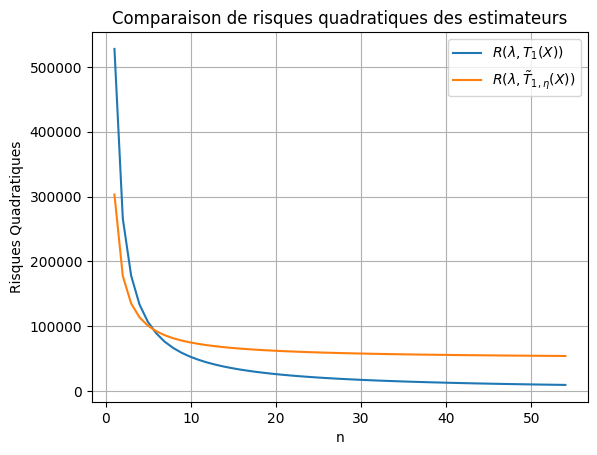

In [9]:
eta = np.log(2)
n = np.linspace(1, dbsSize-1, dbsSize)
plt.plot(n, 1/(n*estimateur**2)) #T1
plt.plot(n, (1/estimateur**2)*((eta-1)**2 + (eta**2/n))) #T1n
plt.legend([r"$R(\lambda, T_1(X))$", r"$R(\lambda, \tilde{T}_{1, \eta}(X))$"])
myplot("Comparaison de risques quadratiques des estimateurs","n","Risques Quadratiques")

#### **Exercice 3 (Test sur le paramètre d’une loi):**

**1. Formuler l’hypothèse null et l’hypothèse alternative.**

On souhaite affirmer avec un faible risque d’erreur que le coût moyen d’un accident est inférieur à un milliard de dollars. Alors, avec les coûts expresés en millons de dollars, l’hypothèse nulle et l’hypothèse alternative sont, respectivement, données par :

* $H_0$ : $\dfrac{1}{\lambda} \geq 1000$

* $H_1$ : $\dfrac{1}{\lambda} < 1000$

Ou encore, après le changement de variables,

* $H_0$ : $\lambda_0 \leq 0.001$

* $H_1$ : $\lambda_1 > 0.001$

**2. En utilisant le principe de Neyman-Pearson donner le test le plus puissant pour le niveau α.**

On s'interesse pour l'usage du principe de Neyman-Pearson pour donner le test le plus puissant pour le niveau $\alpha$. L'idée est d'affirmer avec un faible risque d’erreur que le coût moyen d’un accident est inférieur à un milliard de dollars.

$$
L(\mu; x_1, x_2, ..., x_n) = \prod_{i=1}^{n} f(x_i; \mu,\sigma)
$$

$$
f(x_i; \mu,\sigma) = \prod_{i=1}^{n}\lambda e^{-\lambda x_i} = \lambda^n \; e^{-\lambda\sum_{i=1}^{n}x_i}
$$

Lorsque $\lambda_{1} > \lambda_{0}$, la fonction suivante est croissante

$$
\frac{L(\mu; x_1, x_2, ..., x_n)}{L(\mu'; x_1, x_2, ..., x_n)} = \frac{\prod_{i=1}^{n} \lambda_0 e^{-\lambda_0 x_i}}{\prod_{j=1}^{n} \lambda _1 e^{-\lambda _1 x_j}} = \left(\frac{\lambda_0}{\lambda_1}\right)^n e^{-(\lambda _0 - \lambda _1)\sum_{i=1}^{n}x_i} < k
$$


$$
\alpha = P\left(Y \leq c \;|\; \lambda=\lambda _0\right)
$$

Avec $c = q_{(\alpha)}^{\Gamma(n,\lambda)}$ et $Y = \sum_{i=1}^{n}X_i \sim \Gamma(n,\lambda _0)$.
Pour théorème de Neyman-Pearson, si $\alpha \in \left(0; \ 1\right)$ alors le test est le plus puissant.


**3. Appliquer le test pour l’échantillon considéré au niveau α = 0.05 et donner une réponse...**

In [10]:
lambda0 = 0.001
alpha = 0.05
c = stats.gamma.ppf(alpha, dbsSize, scale=1/(lambda0*dbsSize))
p = 1 - stats.gamma.sf(dbs.mean(), dbsSize, scale=1/(lambda0*dbsSize))
print("c = " + str(c))
verifierP(p,alpha)

c = 789.0147974522822
p-valeur = 0.013717486423264869
Lorsque alpha = 0.05, l'hypothèse nulle est rejetée (p-valeur < α)
On peut affirmer que le coût moyen d’accident est inférieur à un milliard de dollars


**4. Pour la taille de l’échantillon n = 55 et la valeur de λ associée au coût moyen d’un...**

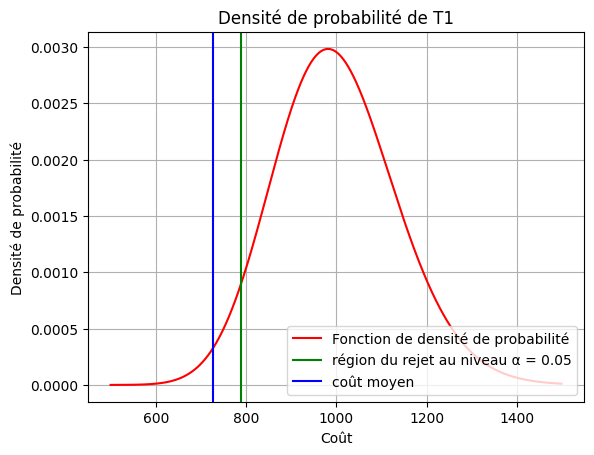

À gauche de la ligne verte, on trouve la région du rejet au niveau α = 0.05


In [11]:
gamma=stats.gamma(dbsSize, scale=1/lambda0)
critique = gamma.ppf(alpha)/dbsSize
limInf = 500
limSup = 1500
x = np.arange(limInf,limSup)
y = stats.gamma.pdf(x, dbsSize, loc=0, scale=1/(dbsSize*lambda0))

plt.plot(x,y, color='r')
plt.axvline(critique,color='g')
plt.axvline(dbs.mean(),color='b')
plt.legend(["Fonction de densité de probabilité","région du rejet au niveau α = 0.05", "coût moyen"],loc="lower right")
myplot('Densité de probabilité de T1',"Coût", "Densité de probabilité")

print("À gauche de la ligne verte, on trouve la région du rejet au niveau α = 0.05")

**5. Tracer la fonction puissance de test pour le niveau α en fonction de λ pour l’échantillon...**

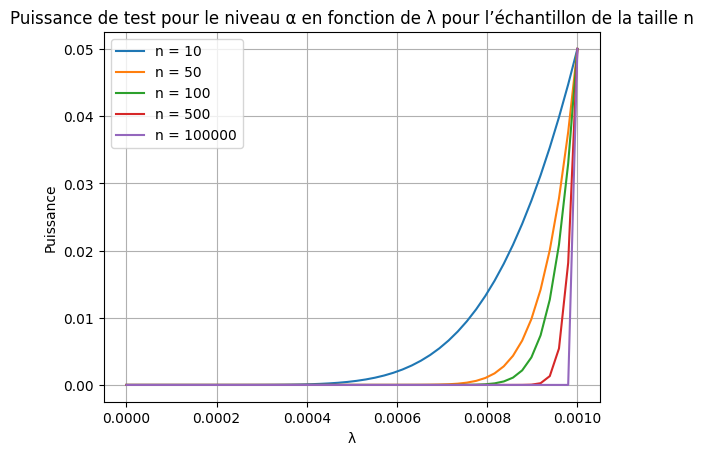

In [12]:
n = [10, 50, 100, 500, 100000]
lamb = np.linspace(0.00000001, 0.001)

for ni in n:
    p = []
    c = stats.gamma.ppf(alpha, ni, scale=1/lambda0)
    for i in range(len(lamb)):
        p.append(stats.gamma.cdf(c, ni, scale=1/lamb[i]))
    plt.plot(lamb,p)

i = 0
while(i < len(n)):
    n[i] = "n = " + str(n[i])
    i = i + 1

plt.legend(n)
myplot("Puissance de test pour le niveau α en fonction de λ pour l’échantillon de la taille n", "λ", "Puissance")

Selon les résultats, on peut conclure qu'avec plus d'échantillons la puissance du test rejette plus, et avec plus sécurité, l'hypothèse nulle dès qu'elle est dans la zone où $H_1$ est vraie. Le graphique avec $n = 100000$ laisse ça plus claire d'où on peut dire que le modèle est plus réaliste quand on a un bon morceau de données (probabilité de rejeter $H_0$ est plus grande quand $H_1$ est vrai).

**6. En utilisant théorème centrale limite, donner une approximation de la loi de T1 et...**

Pour n suffisamment grand, le théorème centrale limite nous donne une approximation de la loi de T1 tel que : 

$T_1(X) \thicksim \mathcal{N}\left(\mu,\dfrac{\sigma^2}{n}\right)$, $Z_n \thicksim \mathcal{N}(0,1)$ avec $T_1(X) = Z\dfrac{ \sigma}{\sqrt n} + \mu$.

Avec $E[T_1(X)]=\dfrac{1}{\lambda}$ et $Var[T_1(X)]=\dfrac{1}{\lambda^2}$, alors $T_{1} \sim \mathcal{N}\left(\dfrac{1}{\lambda},\dfrac{1}{\lambda^{2}n}\right)$.

In [13]:
p=stats.norm.cdf(dbs.mean(), loc = 1/lambda0, scale = np.sqrt(1/((lambda0**2)*dbsSize)))
verifierP(p,alpha)

p-valeur = 0.021201463906399154
Lorsque alpha = 0.05, l'hypothèse nulle est rejetée (p-valeur < α)
On peut affirmer que le coût moyen d’accident est inférieur à un milliard de dollars
